Total length of the input data: 400
Target variable shape: (1,)
Input features shape: (20, 20)
Target variable shape: (1,)
train_data: (300, 20, 20)
train_labels: (300, 1)
test_data: (100, 20, 20)
test_labels: (100, 1)
Epoch 1/31
9/9 [==============================] - 2s 74ms/step - loss: 1.5643 - accuracy: 0.8778 - val_loss: 2.2442 - val_accuracy: 0.8000
Epoch 2/31
9/9 [==============================] - 0s 17ms/step - loss: 1.5318 - accuracy: 0.9148 - val_loss: 0.2127 - val_accuracy: 0.9000
Epoch 3/31
9/9 [==============================] - 0s 18ms/step - loss: 0.5756 - accuracy: 0.9630 - val_loss: 0.1418 - val_accuracy: 0.9333
Epoch 4/31
9/9 [==============================] - 0s 22ms/step - loss: 0.3511 - accuracy: 0.9704 - val_loss: 0.7537 - val_accuracy: 0.8667
Epoch 5/31
9/9 [==============================] - 0s 23ms/step - loss: 0.3999 - accuracy: 0.9556 - val_loss: 1.0453 - val_accuracy: 0.9000
Epoch 6/31
9/9 [==============================] - 0s 24ms/step - loss: 0.6730 - accura

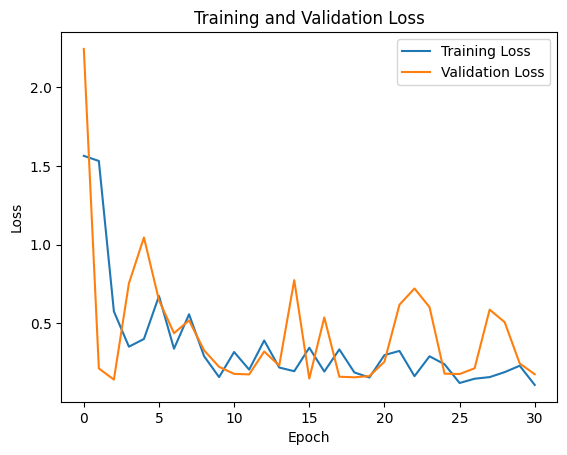

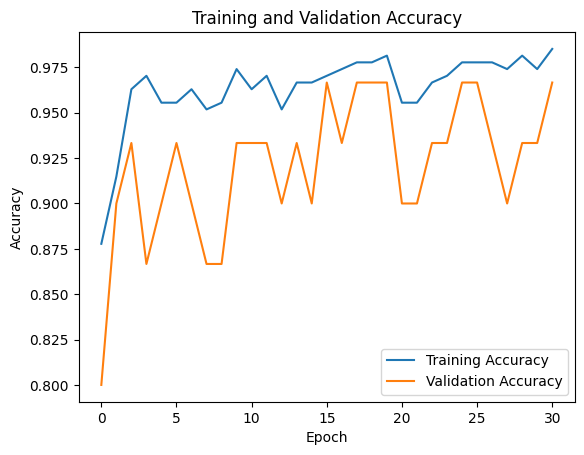

4/4 [==============================] - 0s 19ms/step - loss: 0.0533 - accuracy: 0.9900
Training Accuracy: [0.8777777552604675, 0.914814829826355, 0.9629629850387573, 0.970370352268219, 0.9555555582046509, 0.9555555582046509, 0.9629629850387573, 0.9518518447875977, 0.9555555582046509, 0.9740740656852722, 0.9629629850387573, 0.970370352268219, 0.9518518447875977, 0.9666666388511658, 0.9666666388511658, 0.970370352268219, 0.9740740656852722, 0.9777777791023254, 0.9777777791023254, 0.9814814925193787, 0.9555555582046509, 0.9555555582046509, 0.9666666388511658, 0.970370352268219, 0.9777777791023254, 0.9777777791023254, 0.9777777791023254, 0.9740740656852722, 0.9814814925193787, 0.9740740656852722, 0.9851852059364319]
Validation Accuracy: [0.800000011920929, 0.8999999761581421, 0.9333333373069763, 0.8666666746139526, 0.8999999761581421, 0.9333333373069763, 0.8999999761581421, 0.8666666746139526, 0.8666666746139526, 0.9333333373069763, 0.9333333373069763, 0.9333333373069763, 0.8999999761581421

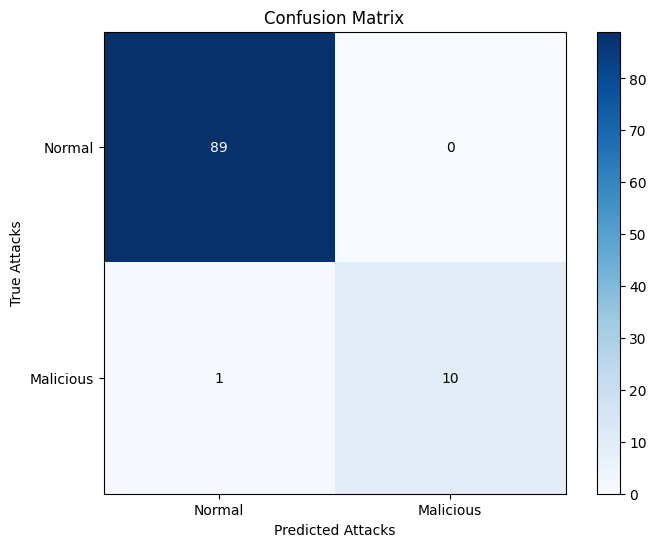

In [2]:
import pickle
import sys
from os.path import isfile
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical, plot_model
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import ast
import csv

# Check if an argument is present
# if len(sys.argv) > 1:
#     SECONDS_FOR_FRAME = float(sys.argv[1])
# else:
SECONDS_FOR_FRAME = 1.1

my_services_dict = None
# Deserialize the dictionary to a file
with open('serialized_dict.pkl', 'rb') as file:
    my_services_dict = pickle.load(file)

# generate an encoding dictionary
ips = list(my_services_dict.keys())
n_ips = len(ips)
# Define the file path
file_path = "data/output/combined.csv"
#
# # Step 1: Load the processed dataset from CSV file
# Deserialization
deserialized_tensors = []
deserialized_labels = []

with open(file_path, "r") as file:
    reader = csv.reader(file)
    header = next(reader)  # Skip the header row
    for row in reader:
        deserialized_tensor = ast.literal_eval(row[0])
        deserialized_label = ast.literal_eval(row[1])
        deserialized_tensors.append(np.array(deserialized_tensor))
        deserialized_labels.append(np.array(deserialized_label))

# Print the shape of the loaded data
print(f"Total length of the input data: {len(deserialized_tensors)}")
print(f"Target variable shape: {deserialized_labels[0].shape}")
print(f"Input features shape: {deserialized_tensors[0].shape}")
print(f"Target variable shape: {deserialized_labels[0].shape}")

# Calculate the split index based on the 75:25 ratio
split_index = int(len(deserialized_tensors) * 0.75)

# Divide the list into two parts
train_data = np.array(deserialized_tensors[:split_index])
train_labels = np.array(deserialized_labels[:split_index])
test_data = np.array(deserialized_tensors[split_index:])
test_labels = np.array(deserialized_labels[split_index:])

print(f"train_data: {train_data.shape}")
print(f"train_labels: {train_labels.shape}")
print(f"test_data: {test_data.shape}")
print(f"test_labels: {test_labels.shape}")
#
# # # Convert labels to categorical one-hot encoding
num_classes = 2
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)
# # # Step 2: Define the CNN model architecture
model = Sequential()
model.add(Conv2D(n_ips, (3, 3), activation='relu', input_shape=(n_ips, n_ips, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
# # # Step 3: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# plot_model(model, to_file='model_graph.png', show_shapes=True, show_layer_names=True)
# # # Step 4: Train the model
epochs = 31
batch_size = 32
history = model.fit(train_data, train_labels, epochs=epochs, batch_size=batch_size, validation_split=0.1)
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()
# Plot training and validation accuracy
train_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()
# # # Step 5: Evaluate the model
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print('Training Accuracy:', train_accuracy)
print('Validation Accuracy:', validation_accuracy)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)


training_accuracy_with_frame_size_dict = pickle.load(open('training_accuracy_with_frame_size_dict.pkl', 'rb')) if isfile('training_accuracy_with_frame_size_dict.pkl') else {}
training_accuracy_with_frame_size_dict[SECONDS_FOR_FRAME] = test_accuracy
# Serialize the dictionary to a file
with open('training_accuracy_with_frame_size_dict.pkl', 'wb') as file:
    pickle.dump(training_accuracy_with_frame_size_dict, file)

# Step 6: Generate the confusion matrix
predictions = model.predict(test_data)
y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(test_labels, axis=1)
cm = confusion_matrix(y_true, y_pred)
class_names = ['Normal', 'Malicious']
# Step 7: Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted Attacks')
plt.ylabel('True Attacks')

# Add labels to each cell
thresh = cm.max() / 2
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='white' if cm[i, j] > thresh else 'black')

plt.show()
